In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu, shapiro
import warnings
warnings.filterwarnings('ignore')

In [2]:
from rpy2 import robjects
from rpy2.robjects import Formula

from rpy2.robjects import pandas2ri
pandas2ri.activate()
from rpy2.robjects.packages import importr

base = importr("base")
stats = importr("stats")
DESeq2 = importr("DESeq2")

# Все 35 трехпетельных белков человека 

In [3]:
upar = pd.read_csv('human_upar.tsv', index_col=0, sep='\t')
upar = set(upar['Approved symbol'])
print(len(upar))

35


# Функция подсчета дифференциальной экспрессии 

In [4]:
def deseq(meta, counts, formula, ref):
    meta["Tissue"] = stats.relevel(robjects.vectors.FactorVector(meta["Tissue"]), ref=ref)

    # Calculate normalization factors
    dds = DESeq2.DESeqDataSetFromMatrix(countData=counts, colData=meta, design=Formula(formula))
    dds = DESeq2.DESeq(dds)

    res = DESeq2.results(dds, name=f"Tissue_AD_vs_{ref}")
    res = DESeq2.lfcShrink(dds, coef=f"Tissue_AD_vs_{ref}", type="apeglm")
    res = pd.DataFrame(base.as_data_frame(res))
    res.index = counts.index
    res = res.sort_values("padj")
    res = res.loc[res["padj"] < 0.05]
    res = res.loc[res["log2FoldChange"].abs() > 0.5]

    return res

# Проект GSE159699 

In [5]:
counts = pd.read_csv('GSE159699/GSE159699_summary_count.star.txt', index_col=0, sep='\t').reindex(upar).dropna()
# counts = counts[counts.T.median() > 5]
print(counts.shape)
counts

(33, 30)


,21-1A-AD,20-1T-AD,23-2A-AD,22-2T-AD,26-3A-AD,24-3T-AD,27-5A-AD,25-5T-AD,29-6T-AD,31-7T-AD,...,10-8A-Old,17-9A-Old,2-12A-Young,4-13A-Young,6-14A-Young,8-15A-Young,9-16A-Young,3-17T-Young,5-18T-Young,7-19T-Young
refGene,,,,,,,,,,,,,,,,,,,,,
LYPD1,49.0,40.0,123.0,45.0,63.0,50.0,90.0,104.0,85.0,90.0,...,90.0,55.0,83.0,99.0,99.0,35.0,67.0,45.0,50.0,84.0
PATE2,20.0,14.0,20.0,5.0,19.0,11.0,11.0,2.0,13.0,18.0,...,27.0,18.0,13.0,14.0,22.0,6.0,6.0,3.0,10.0,8.0
SPACA4,2.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LY6H,942.0,1542.0,764.0,978.0,1321.0,673.0,1037.0,478.0,1646.0,1467.0,...,1993.0,1390.0,2785.0,2100.0,1976.0,203.0,2419.0,332.0,746.0,2543.0
PLAUR,82.0,53.0,82.0,98.0,74.0,48.0,47.0,87.0,41.0,80.0,...,31.0,81.0,69.0,80.0,26.0,95.0,60.0,75.0,80.0,62.0
LY6G5B,34.0,54.0,47.0,75.0,42.0,64.0,31.0,67.0,43.0,32.0,...,61.0,42.0,37.0,27.0,33.0,39.0,67.0,55.0,72.0,56.0
PATE4,19.0,22.0,33.0,9.0,24.0,11.0,24.0,7.0,16.0,39.0,...,24.0,12.0,10.0,4.0,26.0,9.0,19.0,3.0,4.0,5.0
PINLYP,41.0,38.0,55.0,36.0,44.0,76.0,45.0,41.0,36.0,36.0,...,20.0,21.0,31.0,23.0,29.0,11.0,25.0,15.0,35.0,33.0
LY6E,693.0,1139.0,961.0,719.0,1111.0,908.0,819.0,527.0,1124.0,1082.0,...,1638.0,1278.0,2206.0,1965.0,1605.0,292.0,1785.0,404.0,643.0,1463.0


for i, j in [(0, 12), (12, 22), (22, 30)]:
    print(counts.iloc[:, i:j].loc['PSCA'].median())

In [6]:
print('Генов белков, которых нет в проекте', set(upar) - set(counts.index))

Генов белков, которых нет в проекте {'LY6L', 'SLURP2'}


In [7]:
counts.columns.str.split('-').str[-1].value_counts()

AD       12
Old      10
Young     8
dtype: int64

In [8]:
old_df = counts.iloc[:, :22]
meta = pd.DataFrame({"Tissue": ['AD']*12 + ['Old']*10}, index=old_df.columns)
old = deseq(meta, old_df, "~ Tissue", 'Old')
old.columns = 'AD_Old_' + old.columns
old = old[['AD_Old_log2FoldChange', 'AD_Old_padj']]
old

R[write to console]: converting counts to integer mode

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895



,AD_Old_log2FoldChange,AD_Old_padj
refGene,,
LYNX1,-0.627832,0.000355
PINLYP,0.729596,0.008559


In [9]:
young_df = pd.concat([counts.iloc[:, :12], counts.iloc[:, -8:]], axis=1)
meta = pd.DataFrame({"Tissue": ['AD']*12 + ['Young']*8}, index=young_df.columns)
young = deseq(meta, young_df, "~ Tissue", 'Young')
young.columns = 'AD_Young_' + young.columns
young = young[['AD_Young_log2FoldChange', 'AD_Young_padj']]
young

R[write to console]: converting counts to integer mode

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895



,AD_Young_log2FoldChange,AD_Young_padj
refGene,,
LYNX1,-0.513935,0.042246
LY6G6F,1.481236,0.047474
SLURP1,1.136846,0.047474
GPIHBP1,-1.145622,0.049386
LY6G6C,1.191178,0.049386


In [10]:
alls_df = counts.copy()
meta = pd.DataFrame({"Tissue": ['AD']*12 + ['Normal']*18}, index=alls_df.columns)
alls = deseq(meta, alls_df, "~ Tissue", 'Normal')
alls.columns = 'AD_Young_Old_' + alls.columns
alls = alls[['AD_Young_Old_log2FoldChange', 'AD_Young_Old_padj']]
alls

R[write to console]: converting counts to integer mode

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: -- replacing outliers and refitting for 1 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

R[write to console]: estimating dispersions

R[write to console]: fitting model and testing

R[write to console]: using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895



,AD_Young_Old_log2FoldChange,AD_Young_Old_padj
refGene,,
LYNX1,-0.579286,0.000472
PINLYP,0.651884,0.002305


In [11]:
control_df = counts.iloc[:, 12:]
meta = pd.DataFrame({"Tissue": ['AD']*10 + ['control']*8}, index=control_df.columns)
control = deseq(meta, control_df, "~ Tissue", 'control')
control.columns = 'Young_Old_' + control.columns
control = control[['Young_Old_log2FoldChange', 'Young_Old_padj']]
control

R[write to console]: converting counts to integer mode

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895



,Young_Old_log2FoldChange,Young_Old_padj
refGene,,
GPIHBP1,-3.264609,0.000158


In [12]:
counts.shape, len(counts)

((33, 30), 33)

In [13]:
result = alls.join([old, young, control], how='outer')
# result.to_csv('results/GSE159699_result.tsv', sep='\t')
result

,AD_Young_Old_log2FoldChange,AD_Young_Old_padj,AD_Old_log2FoldChange,AD_Old_padj,AD_Young_log2FoldChange,AD_Young_padj,Young_Old_log2FoldChange,Young_Old_padj
LYNX1,-0.579286,0.000472,-0.627832,0.000355,-0.513935,0.042246,NaN,NaN
PINLYP,0.651884,0.002305,0.729596,0.008559,NaN,NaN,NaN,NaN
LY6G6F,NaN,NaN,NaN,NaN,1.481236,0.047474,NaN,NaN
SLURP1,NaN,NaN,NaN,NaN,1.136846,0.047474,NaN,NaN
GPIHBP1,NaN,NaN,NaN,NaN,-1.145622,0.049386,-3.264609,0.000158
LY6G6C,NaN,NaN,NaN,NaN,1.191178,0.049386,NaN,NaN


# Проект http://aging.brain-map.org 

In [14]:
# Загрузка дополнительных данных для разделения пациентов на группы
descr = pd.read_csv('atlas/DonorInformation.csv', index_col=0)
donor_id = pd.read_csv('atlas/columns-samples.csv', index_col=0)
genes = pd.read_csv('atlas/rows-genes.csv', index_col=0).gene_symbol.to_dict()

col = 'dsm_iv_clinical_diagnosis'
descr = descr[descr[col].isin(['No Dementia', "Alzheimer's Disease Type"])][col].to_dict()
donor_id['info'] = donor_id.donor_id.apply(descr.get)
donor_id = (donor_id['info'] + ' ' + donor_id.structure_acronym).to_dict()

In [15]:
fpkm = pd.read_csv('atlas/fpkm_table_normalized.csv', index_col=0)
fpkm.index = fpkm.index.to_series().apply(genes.get)
fpkm.columns = fpkm.columns.to_series().apply(lambda x: donor_id.get(int(x)))
list_col = fpkm.columns.value_counts().index.tolist()
fpkm = fpkm.reindex(upar).dropna()[list_col]
# fpkm = fpkm[fpkm.T.median() > 0]
print(fpkm.shape)
fpkm

(33, 303)


,No Dementia TCx,No Dementia TCx,No Dementia TCx,No Dementia TCx,No Dementia TCx,No Dementia TCx,No Dementia TCx,No Dementia TCx,No Dementia TCx,No Dementia TCx,...,Alzheimer's Disease Type HIP,Alzheimer's Disease Type HIP,Alzheimer's Disease Type HIP,Alzheimer's Disease Type HIP,Alzheimer's Disease Type HIP,Alzheimer's Disease Type HIP,Alzheimer's Disease Type HIP,Alzheimer's Disease Type HIP,Alzheimer's Disease Type HIP,Alzheimer's Disease Type HIP
gene_id \ rnaseq_profile_id,,,,,,,,,,,,,,,,,,,,,
LYPD1,6.413853,4.371896,3.845198,4.051021,6.120362,2.731581,5.081251,6.916344,7.974312,7.150403,...,26.809359,2.690748,18.738045,5.738345,7.430804,2.596301,14.930962,10.278910,13.047278,7.604792
PATE2,0.897302,1.316229,0.215817,0.672910,1.110355,0.254646,1.149864,1.177394,1.329485,0.644939,...,0.273948,0.383019,0.619078,0.668618,0.905078,0.434094,0.860751,0.683645,0.811875,0.310106
SPACA4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.080938,0.000000,0.000000,...,0.092761,0.000000,0.000000,0.036452,0.047996,0.000000,0.000000,0.000000,0.000000,0.000000
LY6H,19.809737,27.016493,21.793619,26.032408,22.118854,20.082310,13.918839,40.205469,23.233863,23.352742,...,67.528969,35.776486,61.251017,33.530352,79.759715,18.017605,49.411340,58.743719,45.986354,40.841348
PLAUR,2.121441,3.427030,2.646145,1.745287,2.341226,2.912498,1.349863,1.313472,1.368288,2.049620,...,1.920127,1.917031,0.602146,1.247676,4.358949,4.019822,1.026049,1.982242,1.727840,2.985527
LY6G5B,2.663793,2.183498,2.142098,3.279771,2.257528,6.067300,1.974146,2.386403,1.399098,3.525474,...,1.188258,2.920764,1.178813,2.410148,2.657672,2.054110,2.508792,1.284646,2.034928,1.317973
PATE4,2.714351,2.112223,2.184106,2.064244,2.505557,1.465285,1.913332,2.410847,3.014252,1.728502,...,1.130468,1.474669,2.322315,1.696896,1.629441,1.777113,1.478831,1.519994,1.604356,1.951564
PINLYP,1.337137,1.853064,0.528007,1.226979,1.097888,1.333579,1.408177,1.180840,1.715420,2.232561,...,2.417481,3.699100,1.353686,3.055277,1.798621,2.528493,1.120525,1.733533,1.852333,2.623767
LY6E,22.918028,27.240175,23.991783,27.453322,33.140609,32.492562,21.142665,33.265643,16.710510,22.758431,...,43.195189,37.067208,54.950306,23.891853,57.162270,25.881895,36.740634,53.764085,33.837886,32.681924


In [16]:
for name in fpkm.columns.str.split().str[-1].unique():
    for i in fpkm.index:
#         print(i, name)
        data = fpkm.loc[i][[f"Alzheimer's Disease Type {name}", f"No Dementia {name}"]].reset_index()
        sns.histplot(data=data, x=i, #alpha=0.6,
                     hue='index', bins=10, stat='density',
                     kde=True)
        plt.tight_layout()
        plt.savefig(f'figures/{i}_{name}.png', facecolor='white')
        plt.close()

In [17]:
print('Генов белков, которых нет в проекте', set(upar) - set(fpkm.index))

Генов белков, которых нет в проекте {'LY6L', 'SLURP2'}


In [18]:
# Группы пациентов по болезни и области мозга
pval=0.06
inds = fpkm.columns.value_counts()
inds

No Dementia TCx                 50
No Dementia HIP                 50
No Dementia FWM                 47
No Dementia PCx                 46
Alzheimer's Disease Type TCx    29
Alzheimer's Disease Type FWM    28
Alzheimer's Disease Type PCx    28
Alzheimer's Disease Type HIP    25
dtype: int64

In [19]:
descr = pd.read_csv('atlas/DonorInformation.csv', index_col=0)
descr.head()

,name,age,sex,apo_e4_allele,education_years,age_at_first_tbi,longest_loc_duration,cerad,num_tbi_w_loc,dsm_iv_clinical_diagnosis,control_set,nincds_arda_diagnosis,ever_tbi_w_loc,race,hispanic,act_demented,braak,nia_reagan
donor_id,,,,,,,,,,,,,,,,,,
326765665,H14.09.078,87,M,N,16,0,Unknown or N/A,0,0,No Dementia,31,No Dementia,N,White,Not Hispanic,No Dementia,1,1
326765656,H14.09.069,95-99,M,N,17,12,1-2 min,2,1,No Dementia,26,No Dementia,Y,White,Not Hispanic,No Dementia,5,2
326765654,H14.09.067,85,M,Y,10,72,< 10 sec,3,1,Vascular,25,"Dementia, Type Unknown",Y,White,Not Hispanic,Dementia,4,2
467056391,H15.09.103,90-94,F,N,11,87,< 10 sec,0,1,No Dementia,52,No Dementia,Y,White,Not Hispanic,No Dementia,4,0
309335447,H14.09.010,100+,M,Y,16,0,Unknown or N/A,3,0,Alzheimer's Disease Type,28,Possible Alzheimer'S Disease,N,White,Not Hispanic,Dementia,4,2


In [20]:
pd.read_csv('atlas/columns-samples.csv', index_col=0)

,donor_id,donor_name,specimen_id,specimen_name,rna_well_id,polygon_id,structure_id,structure_acronym,structure_color,structure_name,hemisphere
rnaseq_profile_id,,,,,,,,,,,
488395315,309335467,H14.09.030,309357843,H14.09.030.TCx.01,395325172,320817998,10235,TCx,#ebbfd0,temporal neocortex,left
496100277,309335441,H14.09.004,309357624,H14.09.004.PCx.01,320630866,310967169,10557,FWM,#f2f1f0,white matter of forebrain,right
496100278,309335438,H14.09.001,309357596,H14.09.001.PCx.01,320630834,310790571,10557,FWM,#f2f1f0,white matter of forebrain,left
496100279,309335438,H14.09.001,309357599,H14.09.001.TCx.01,320630838,310790522,10235,TCx,#ebbfd0,temporal neocortex,left
496100281,309335439,H14.09.002,309357603,H14.09.002.HIP.01,320630842,310790372,10294,HIP,#bfb5d5,hippocampus (hippocampal formation),right
...,...,...,...,...,...,...,...,...,...,...,...
496100667,467056391,H15.09.103,467179071,H15.09.103.TCx.01,482655826,480366830,10235,TCx,#ebbfd0,temporal neocortex,right
496100669,467056391,H15.09.103,467179068,H15.09.103.PCx.01,482655822,480363830,10557,FWM,#f2f1f0,white matter of forebrain,right
496100670,467056406,H15.09.107,467179104,H15.09.107.TCx.01,482655780,480363840,10235,TCx,#ebbfd0,temporal neocortex,right


# t-test 

In [21]:
df = fpkm[['No Dementia HIP', "Alzheimer's Disease Type HIP"]]
n = 50
ttest = pd.DataFrame([ttest_ind(df.loc[gene].iloc[:n], df.loc[gene].iloc[n:]) for gene in df.index], index=df.index, columns=["t-test", 'p-value'])
ttest[ttest['p-value'] < pval].sort_values('p-value')

,t-test,p-value
gene_id \ rnaseq_profile_id,,
PSCA,-2.375157,0.020170
PATE1,1.944189,0.055726


In [22]:
df = fpkm[['No Dementia TCx', "Alzheimer's Disease Type TCx"]]
n = 50
ttest = pd.DataFrame([ttest_ind(df.loc[gene].iloc[:n], df.loc[gene].iloc[n:]) for gene in df.index], index=df.index, columns=["t-test", 'p-value'])
ttest[ttest['p-value'] < pval].sort_values('p-value')

,t-test,p-value
gene_id \ rnaseq_profile_id,,
TEX101,2.681051,0.008974
LYPD5,-2.470850,0.015689
SPACA4,-2.138316,0.035662
LY6K,-1.997161,0.049341
LY6G5B,1.977067,0.051614


In [23]:
df = fpkm[['No Dementia FWM', "Alzheimer's Disease Type FWM"]]
n = 47
ttest = pd.DataFrame([ttest_ind(df.loc[gene].iloc[:n], df.loc[gene].iloc[n:]) for gene in df.index], index=df.index, columns=["t-test", 'p-value'])
ttest[ttest['p-value'] < pval].sort_values('p-value')

,t-test,p-value
gene_id \ rnaseq_profile_id,,
GML,-3.316151,0.001424
LYPD8,-2.485140,0.015241
PATE3,-2.468970,0.015891
LYPD5,-2.425325,0.017768
PATE4,-2.399699,0.018961
LY6G6F,-2.196930,0.031200
LYPD4,2.094322,0.039703
LY6G6E,-1.994868,0.049791
GPIHBP1,1.940284,0.056208


In [24]:
df = fpkm[['No Dementia PCx', "Alzheimer's Disease Type PCx"]]
n = 46
ttest = pd.DataFrame([ttest_ind(df.loc[gene].iloc[:n], df.loc[gene].iloc[n:]) for gene in df.index],
                     index=df.index, columns=["t-test", 'p-value'])
ttest[ttest['p-value'] < pval].sort_values('p-value')

,t-test,p-value
gene_id \ rnaseq_profile_id,,
LYPD5,-2.429738,0.017605


# mannwhitneyu 

In [25]:
df = fpkm[['No Dementia HIP', "Alzheimer's Disease Type HIP"]]
n = 50
mw = pd.DataFrame([mannwhitneyu(df.loc[gene].iloc[:n], df.loc[gene].iloc[n:]) for gene in df.index],
                  index=df.index, columns=["mw_hip", 'p-value_hip'])
hip = mw[mw['p-value_hip'] < pval].sort_values('p-value_hip')
hip

,mw_hip,p-value_hip
gene_id \ rnaseq_profile_id,,
PSCA,447.0,0.021471
LYPD8,454.0,0.027666
PATE1,468.0,0.039295
LYPD1,472.0,0.043269


In [26]:
df = fpkm[['No Dementia TCx', "Alzheimer's Disease Type TCx"]]
n = 50
mw = pd.DataFrame([mannwhitneyu(df.loc[gene].iloc[:n], df.loc[gene].iloc[n:]) for gene in df.index],
                  index=df.index, columns=["mw_tcx", 'p-value_tcx'])
tcx = mw[mw['p-value_tcx'] < pval].sort_values('p-value_tcx')
tcx

,mw_tcx,p-value_tcx
gene_id \ rnaseq_profile_id,,
TEX101,463.5,0.002637
LYPD5,486.0,0.007638
SPACA4,605.0,0.033923
LY6G5B,547.0,0.035510
LYNX1,555.0,0.042356
LYPD6,556.0,0.043282
LY6K,570.5,0.044648


In [27]:
df = fpkm[['No Dementia FWM', "Alzheimer's Disease Type FWM"]]
n = 47
mw = pd.DataFrame([mannwhitneyu(df.loc[gene].iloc[:n], df.loc[gene].iloc[n:]) for gene in df.index], index=df.index,
                  columns=["mw_fwm", 'p-value_fwm'])
fwm = mw[mw['p-value_fwm'] < pval].sort_values('p-value_fwm')
fwm

,mw_fwm,p-value_fwm
gene_id \ rnaseq_profile_id,,
GML,414.0,0.000377
LYPD5,414.0,0.003824
LYPD8,437.0,0.007841
PATE3,439.0,0.008315
LY6G6E,479.0,0.009106
PATE4,451.0,0.011851
LYPD4,451.0,0.011851
LYNX1,453.0,0.012545
LY6G6F,524.0,0.015725


In [28]:
df = fpkm[['No Dementia PCx', "Alzheimer's Disease Type PCx"]]
n = 46
mw = pd.DataFrame([mannwhitneyu(df.loc[gene].iloc[:n], df.loc[gene].iloc[n:]) for gene in df.index],
                  index=df.index, columns=["mw_pcx", 'p-value_pcx'])
pcx = mw[mw['p-value_pcx'] < pval].sort_values('p-value_pcx')
pcx

,mw_pcx,p-value_pcx
gene_id \ rnaseq_profile_id,,
LYPD5,441.0,0.012005
GPIHBP1,496.0,0.050091


# Результаты 

In [29]:
res = hip.join([fwm, tcx, pcx], how='outer')
print(res.shape)
# res.to_csv('results/atlas_result.tsv', sep='\t')
cols = ['mw_hip', 'mw_fwm', 'mw_tcx', 'mw_pcx',
        'AD_Young_Old_log2FoldChange', 'AD_Young_Old_padj',
       'AD_Old_log2FoldChange', 'AD_Young_log2FoldChange',
       'Young_Old_log2FoldChange',
       'Young_Old_padj']
# res = res.join(result, how='inner').drop(cols, axis=1)
res

(23, 8)


,mw_hip,p-value_hip,mw_fwm,p-value_fwm,mw_tcx,p-value_tcx,mw_pcx,p-value_pcx
PSCA,447.0,0.021471,NaN,NaN,NaN,NaN,NaN,NaN
LYPD8,454.0,0.027666,437.0,0.007841,NaN,NaN,NaN,NaN
PATE1,468.0,0.039295,NaN,NaN,NaN,NaN,NaN,NaN
LYPD1,472.0,0.043269,510.0,0.053085,NaN,NaN,NaN,NaN
GML,NaN,NaN,414.0,0.000377,NaN,NaN,NaN,NaN
LYPD5,NaN,NaN,414.0,0.003824,486.0,0.007638,441.0,0.012005
PATE3,NaN,NaN,439.0,0.008315,NaN,NaN,NaN,NaN
LY6G6E,NaN,NaN,479.0,0.009106,NaN,NaN,NaN,NaN
PATE4,NaN,NaN,451.0,0.011851,NaN,NaN,NaN,NaN
LYPD4,NaN,NaN,451.0,0.011851,NaN,NaN,NaN,NaN


In [30]:
result

,AD_Young_Old_log2FoldChange,AD_Young_Old_padj,AD_Old_log2FoldChange,AD_Old_padj,AD_Young_log2FoldChange,AD_Young_padj,Young_Old_log2FoldChange,Young_Old_padj
LYNX1,-0.579286,0.000472,-0.627832,0.000355,-0.513935,0.042246,NaN,NaN
PINLYP,0.651884,0.002305,0.729596,0.008559,NaN,NaN,NaN,NaN
LY6G6F,NaN,NaN,NaN,NaN,1.481236,0.047474,NaN,NaN
SLURP1,NaN,NaN,NaN,NaN,1.136846,0.047474,NaN,NaN
GPIHBP1,NaN,NaN,NaN,NaN,-1.145622,0.049386,-3.264609,0.000158
LY6G6C,NaN,NaN,NaN,NaN,1.191178,0.049386,NaN,NaN


In [31]:
ls = hip.join([fwm, tcx, pcx], how='outer').join(result, how='outer')
ls = ls[~ls.index.isin(result.index)]
ls

,mw_hip,p-value_hip,mw_fwm,p-value_fwm,mw_tcx,p-value_tcx,mw_pcx,p-value_pcx,AD_Young_Old_log2FoldChange,AD_Young_Old_padj,AD_Old_log2FoldChange,AD_Old_padj,AD_Young_log2FoldChange,AD_Young_padj,Young_Old_log2FoldChange,Young_Old_padj
CD59,NaN,NaN,497.0,0.039370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GML,NaN,NaN,414.0,0.000377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LY6E,NaN,NaN,488.0,0.031682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LY6G5B,NaN,NaN,NaN,NaN,547.0,0.035510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LY6G6E,NaN,NaN,479.0,0.009106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LY6H,NaN,NaN,489.0,0.032469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LY6K,NaN,NaN,NaN,NaN,570.5,0.044648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LYPD1,472.0,0.043269,510.0,0.053085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LYPD4,NaN,NaN,451.0,0.011851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LYPD5,NaN,NaN,414.0,0.003824,486.0,0.007638,441.0,0.012005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
fpkm.loc[(fpkm.T.median() > 0)]

,No Dementia TCx,No Dementia TCx,No Dementia TCx,No Dementia TCx,No Dementia TCx,No Dementia TCx,No Dementia TCx,No Dementia TCx,No Dementia TCx,No Dementia TCx,...,Alzheimer's Disease Type HIP,Alzheimer's Disease Type HIP,Alzheimer's Disease Type HIP,Alzheimer's Disease Type HIP,Alzheimer's Disease Type HIP,Alzheimer's Disease Type HIP,Alzheimer's Disease Type HIP,Alzheimer's Disease Type HIP,Alzheimer's Disease Type HIP,Alzheimer's Disease Type HIP
gene_id \ rnaseq_profile_id,,,,,,,,,,,,,,,,,,,,,
LYPD1,6.413853,4.371896,3.845198,4.051021,6.120362,2.731581,5.081251,6.916344,7.974312,7.150403,...,26.809359,2.690748,18.738045,5.738345,7.430804,2.596301,14.930962,10.278910,13.047278,7.604792
PATE2,0.897302,1.316229,0.215817,0.672910,1.110355,0.254646,1.149864,1.177394,1.329485,0.644939,...,0.273948,0.383019,0.619078,0.668618,0.905078,0.434094,0.860751,0.683645,0.811875,0.310106
LY6H,19.809737,27.016493,21.793619,26.032408,22.118854,20.082310,13.918839,40.205469,23.233863,23.352742,...,67.528969,35.776486,61.251017,33.530352,79.759715,18.017605,49.411340,58.743719,45.986354,40.841348
PLAUR,2.121441,3.427030,2.646145,1.745287,2.341226,2.912498,1.349863,1.313472,1.368288,2.049620,...,1.920127,1.917031,0.602146,1.247676,4.358949,4.019822,1.026049,1.982242,1.727840,2.985527
LY6G5B,2.663793,2.183498,2.142098,3.279771,2.257528,6.067300,1.974146,2.386403,1.399098,3.525474,...,1.188258,2.920764,1.178813,2.410148,2.657672,2.054110,2.508792,1.284646,2.034928,1.317973
PATE4,2.714351,2.112223,2.184106,2.064244,2.505557,1.465285,1.913332,2.410847,3.014252,1.728502,...,1.130468,1.474669,2.322315,1.696896,1.629441,1.777113,1.478831,1.519994,1.604356,1.951564
PINLYP,1.337137,1.853064,0.528007,1.226979,1.097888,1.333579,1.408177,1.180840,1.715420,2.232561,...,2.417481,3.699100,1.353686,3.055277,1.798621,2.528493,1.120525,1.733533,1.852333,2.623767
LY6E,22.918028,27.240175,23.991783,27.453322,33.140609,32.492562,21.142665,33.265643,16.710510,22.758431,...,43.195189,37.067208,54.950306,23.891853,57.162270,25.881895,36.740634,53.764085,33.837886,32.681924
PATE1,0.257974,0.361722,0.242484,0.312346,0.329072,0.207149,0.394759,0.261280,0.453124,0.432517,...,0.000000,0.126699,0.197645,0.191386,0.513541,0.104598,0.154480,0.276550,0.190553,0.277453


In [33]:
for j in res.index:
    tmp = []
    for i in fpkm.columns.unique():

        tmp.append(fpkm.loc[j, i].median())
    if sum(tmp) < 10:
        print(j, max(tmp))

PSCA 0.144160286513388
PATE1 0.419906333095546
GML 0.168711819857566
PATE3 0.670207051506318
LY6G6E 0.02513948839815805
LYPD4 0.682424621940763
LY6G6F 0.0
PATE2 0.9896913098865942
LY6G6C 0.0
TEX101 0.0785572631058375
SPACA4 0.0
LY6K 0.14167716498456698


# Тепловые карты 

(11, 303)


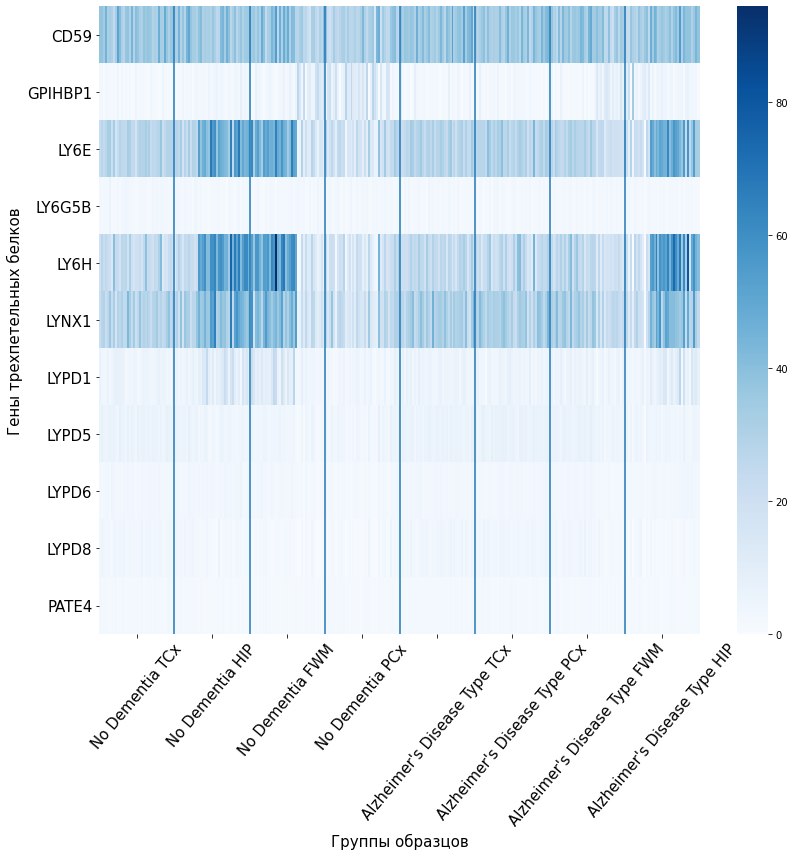

In [34]:
data = fpkm.copy()
inds = []
for j in res.index:
    tmp = []
    for i in fpkm.columns.unique():
        tmp.append(fpkm.loc[j, i].median())
    if min(tmp) > 1:
        inds.append(j)
data = data.loc[inds].sort_index()
print(data.shape)
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(data=data, ax=ax, cmap='Blues')

inds = fpkm.columns.shape[0] / 8
xlab = list({i.get_text(): 0 for i in ax.get_xticklabels()}.keys())
ax.set_xticks([i * inds - (inds/2) for i in range(1, 9)])
ax.set_xticklabels(xlab, rotation=50, size=15)

ax.set_yticklabels(ax.get_yticklabels(), rotation=0, size=15)
ax.set_xlabel('Группы образцов', size=15)
ax.set_ylabel('Гены трехпетельных белков', size=15)
ax.vlines([i * inds for i in range(1, 8)], *ax.get_ylim())
plt.tight_layout()
plt.savefig('results/heatmap_medexpr_1', facecolor='white', format='png')
plt.show()

(23, 303)


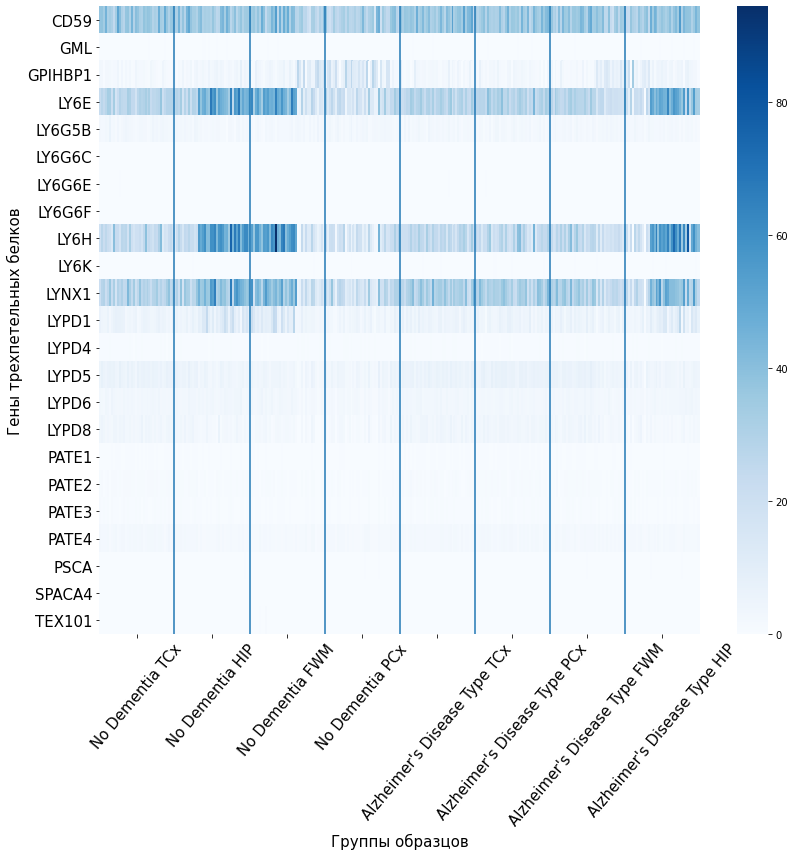

In [35]:
data = fpkm.copy().loc[res.index].sort_index()

print(data.shape)
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(data=data, ax=ax, cmap='Blues')

inds = fpkm.columns.shape[0] / 8
xlab = list({i.get_text(): 0 for i in ax.get_xticklabels()}.keys())
ax.set_xticks([i * inds - (inds/2) for i in range(1, 9)])
ax.set_xticklabels(xlab, rotation=50, size=15)

ax.set_yticklabels(ax.get_yticklabels(), rotation=0, size=15)
ax.set_xlabel('Группы образцов', size=15)
ax.set_ylabel('Гены трехпетельных белков', size=15)
ax.vlines([i * inds for i in range(1, 8)], *ax.get_ylim())
plt.tight_layout()
plt.savefig('results/heatmap_all_atlas', facecolor='white', format='png')
plt.show()

In [36]:
lens = pd.read_csv('gencode.v34.lengths.tsv', index_col=0, sep='\t')['Length'].to_dict()

(33, 30)


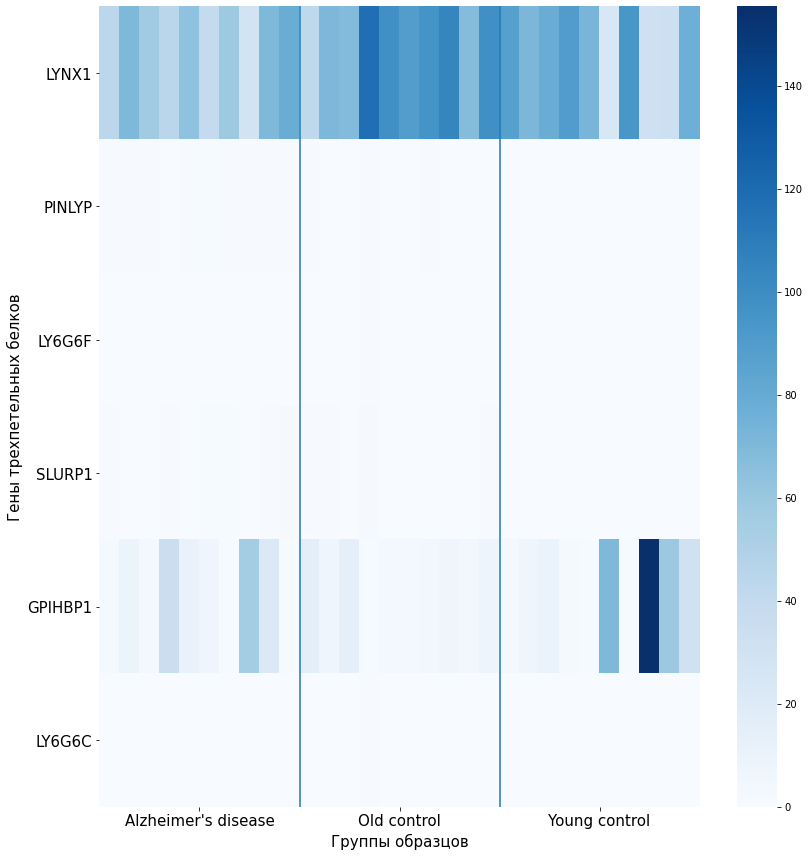

In [37]:
data = pd.read_csv('GSE159699/GSE159699_summary_count.star.txt', index_col=0, sep='\t')
data = data / data.sum()
data = data.T.apply(lambda x: x * 1000000000 / lens.get(x.name, -1)).T
data = data.reindex(upar).dropna()
print(data.shape)

fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(data=data.reindex(result.index), ax=ax, cmap='Blues')

inds = data.columns.shape[0] / 3
xlab = ["Alzheimer's disease", 'Old control', "Young control"]
ax.set_xticks([i * inds - (inds / 2) for i in range(1, 4)])
ax.set_xticklabels(xlab, rotation=0, size=15)

ax.set_yticklabels(ax.get_yticklabels(), rotation=0, size=15)
ax.set_xlabel('Группы образцов', size=15)
ax.set_ylabel('Гены трехпетельных белков', size=15)
ax.vlines([i * inds for i in range(1, 3)], *ax.get_ylim())
plt.tight_layout()
plt.savefig('results/heatmap_all_GSE', facecolor='white', format='png')
plt.show()

In [38]:
data.columns = data.columns.str.split('-').str[-1]
df = pd.DataFrame()
for i in fpkm.columns.unique():
    tmp = fpkm[i].T.median()
    df = pd.concat([df, tmp], axis=1)
    df.columns = df.columns.tolist()[:-1] + [i]
for i in data.columns.unique():
    tmp = data[i].T.median()
    df = pd.concat([df, tmp], axis=1)
    df.columns = df.columns.tolist()[:-1] + [i]
df.to_csv('results/expression_medians.tsv', sep='\t')
df

,No Dementia TCx,No Dementia HIP,No Dementia FWM,No Dementia PCx,Alzheimer's Disease Type TCx,Alzheimer's Disease Type PCx,Alzheimer's Disease Type FWM,Alzheimer's Disease Type HIP,AD,Old,Young
refGene,,,,,,,,,,,
LYPD1,4.929421,10.305176,3.326761,5.173683,4.861862,5.238030,4.200460,8.493608,1.509478,1.652089,1.254466
PATE2,0.955893,0.579234,0.410590,0.970965,0.989691,0.871217,0.649124,0.623307,0.697313,0.883393,0.372883
SPACA4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LY6H,22.238813,53.965585,15.884002,24.214489,21.338138,24.548227,17.878360,52.556849,52.059351,56.395159,73.706333
PLAUR,2.094219,2.111359,2.126071,2.176461,2.086558,2.197500,2.374423,2.154774,1.478638,1.139159,1.134369
LY6G5B,2.888952,2.080850,2.803920,2.339560,2.462787,2.282286,2.572154,2.307121,1.414615,1.313958,1.171649
PATE4,2.234293,1.651840,1.642559,2.032177,2.248536,2.085977,1.913561,1.696896,0.610353,0.449316,0.157347
PINLYP,1.350045,2.238948,1.238564,1.600706,1.214541,1.396412,1.108097,2.323565,0.710058,0.375278,0.407170
LY6E,27.530365,47.043819,16.401695,27.736810,27.750404,27.970867,19.695905,46.832144,32.196166,39.769102,42.612045


In [39]:
import os
print(os.listdir('atlas'))

['group_weights.csv', 'columns-samples.csv', 'fpkm_table_normalized.csv', 'ProteinAndPathologyQuantifications.csv', 'tbi_data_files.csv', 'DescriptionOfStains.csv', 'rows-genes.csv', 'DonorInformation.csv', 'README.txt']
